Welcome to week 3 Linear regression guide. Last week, we performed some visualizations and tried to see relationship of various variables with each other and with our target variable. This week, we will perform linear regression:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\srtpa\Desktop\jupyter notebooks\Data\kc_house_data.csv")
df['age']=2015-df['yr_built']
df['renovation']=2015-df['yr_renovated']
df.drop(columns=["id",'date','yr_built','yr_renovated'], inplace=True)

After performing initial visualizations on our data, now, there are two options for us, we can either one variable to predict prices or we can use a combination of features to predict the target variable, which is the price of our houses in King county, USA. At first, we will choose one parameter and train our model based on that.

As mentioned before, in our dataset, price is the dependent or target variable which is the target of our model. Other variables than price will be independent variables which will help us determine the target variable. So we will first make a Simple linear regression model which will use the dependent variable and one independent variable to train and test our model.

# Simple linear regression model

LinearRegression fits a linear model with coefficients w= (w1,w2,w3,...) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Linear regression is essentially a model based on Ordinary Least sqaure algorithm.

## Training and testing the model

In a machine learning program, we train the model with some dataset and then test the model with some other dataset. It is similar to how we teach kids to learn. We give them textbooks with the entire syllabus to train themselves and then we test them from some questions from the textbook. We evaluate the kids based on how many answers they get correct. Similarly, we have some parameters to check whether our model is able to get the right answers or not.

We will have to split the data in two halves as training and testing data. Training data will be used to train and the other to test. We will use the data from same dataset to avoid variations. We will keep 70% of the dataset for training and we will split using scikit learn's train_test_split. We will fit the model using linear regression module.

## Evaluating our Machine Learning model

There are a number of metrics which can be used to check the performance of our regression model. Depeding upon the problem and the data, suitable metric can be used.

I am using the content from: https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

**1. R squared or adjusted R squared:** R Square measures how much of variability in dependent variable can be explained by the model. It is square of Correlation Coefficient(R) and that is why it is called R Square. R Square is calculated by the sum of squared of prediction error divided by the total sum of square which replace the calculated prediction with mean. R Square value is between 0 to 1 and bigger value indicates a better fit between prediction and actual value. R Square is a good measure to determine how well the model fits the dependent variables.

However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalise additional independent variables added to the model and adjust the metric to prevent overfitting issue.

**2. Mean Square Error(MSE)/Root Mean Square Error(RMSE):** While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit. MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and make it easier for interpretation.

**3. Mean Absolute Error(MAE):** Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of absolute value of error. Compared to MSE or RMSE, MAE is a more direct representation of sum of error terms. MSE gives larger penalisation to big prediction error by square it while MAE treats all errors the same.

We will start off by creating a function which outputs all the evaluation metrics, so that it will be easier to test every model without writing a lot of codes!

 
Our dependent variable is fixed, we have to choose the dependent variable. So, we will make use of the correlation matrix to find out which should the independent variable we should use. If we look at the matrix, price is highly correlated to the 'sqft_living' so we will start with this variable. At first, we will visualize the relationship between both variables and determine if its linear or not

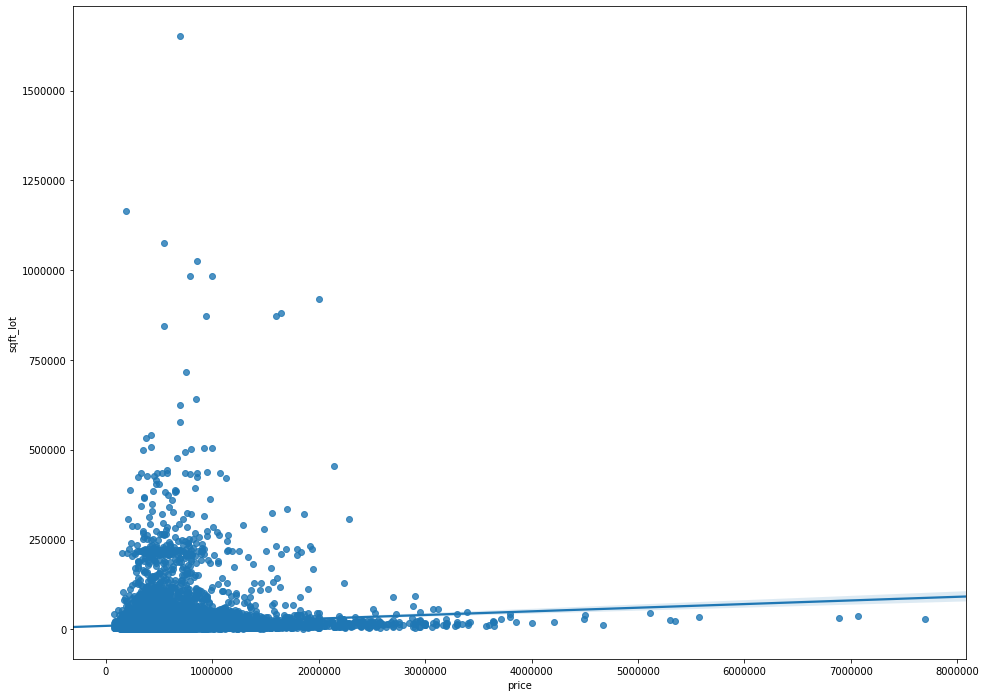

In [3]:
f, ax = plt.subplots(figsize=(16, 12))
sns.regplot(x="price", y="sqft_lot", data=df)

From the plot, it is clear that they both share a linear relationship with some outliers. Let us have a look at the top 100 elements and how it looks like:

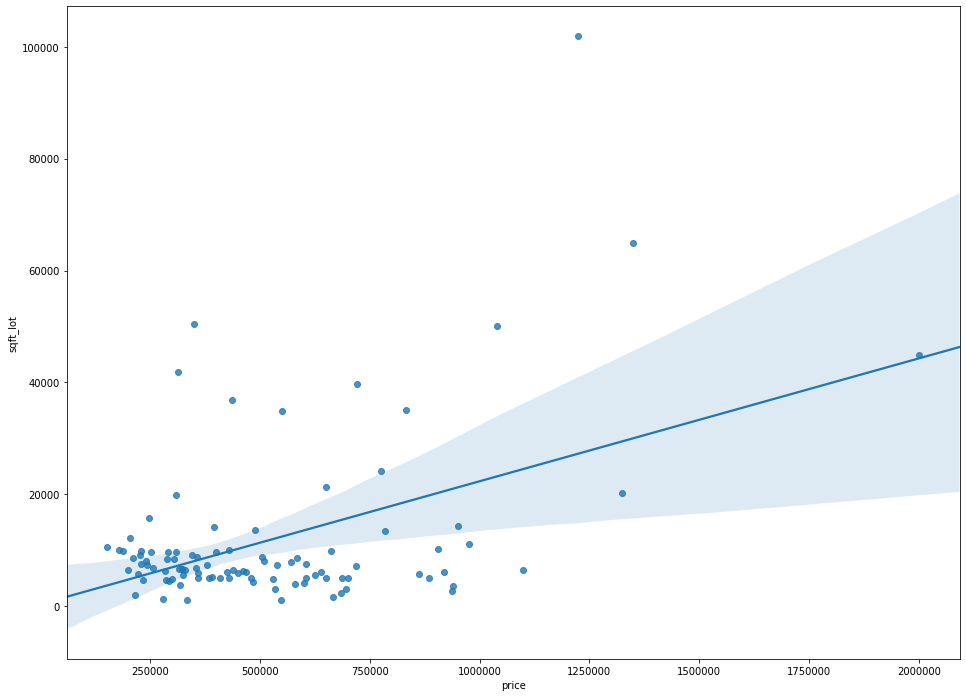

In [4]:
f, ax = plt.subplots(figsize=(16, 12))
sns.regplot(x="price", y="sqft_lot", data=df.iloc[0:100,:])

As expected, the relationship is linear. It is time to start building our model and we have chosen simple linear regression. Let us try to fit a line on our dataset and see what is the value of m and c in the straight line that will fit. The ordinary least square method will be used to fit the line. Ordinary least squares, or linear least squares, estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.

We will use the python libraries scikit learn and statsmodels to apply Linear regression.

In [7]:
feature_cols = ['sqft_living']
X = df[feature_cols]
y = df.price

reg = LinearRegression()
hp=reg.fit(X, y)

print(hp.intercept_)
print(hp.coef_)

-43580.743094473146
[280.6235679]


The line fitting the above coeeficients will be y= 280x - 43580 approximately. There is always an error involved as we cannot find a perfect fit to the data we have at hand.

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean.

In [8]:
hp.score(X, y)

0.4928532179037931

The value is low, we can improve the model by including more features and instead of a simple linear regression, we will use multiple linear regression. Furthermore, one more thing to note here is, with r sqaured is we cannot be so sure whether it is the correct measure to evaluate the performance of our model.

It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

# Multiple linear regression

We have tried simple linear regression on our model and now we will try multiple linear regression using a combination of factors and we will see what works best. We will have to perform feature selection:

Feature selection We will have to look for two correlations:

The correlation between dependent and independent variables: We will use features which are highly correlated to the dependent variable.

Correlation between independent variables: We will remove one of the two highly correlated features as they will essentially behave in the same manner and using a lot of features might result in overfitting and an increase in training and evaluating model.

We will be trying a combination of various features to see which gives us a better r sqaured values. {Note: Have to update with adjusted r squared value}

In [9]:
feature_cols1 = ['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms']
X = df[feature_cols1]
y = df.price

hp1 = LinearRegression()
hp1.fit(X, y)

print(hp1.intercept_)
print(hp1.coef_)
hp1.score(X, y)

-646863.7468171908
[ 2.28200935e+01 -8.04846751e+01  1.11024920e+05  2.45420816e+02
 -3.54640227e+04]


0.544219816528976

This gives us a better result of our R sqaured value. Now, we will perform the trai test split and train our model based on that. 